## De imports

In [1]:
import bpy
import numpy as np
import matplotlib.pyplot as plt
import tempfile
from PIL import Image
import warnings
from helper_functies import *
from IPython.display import Image as JupImage
import imageio
import bmesh
import mathutils
from mathutils import Vector

bpy.ops.render.render()
bpy.data.images['Render Result'].save_render(filepath = '/tmp/image.png')

## Noodzakelijk voorwerk

In [2]:
tmpdir=tempfile.TemporaryDirectory()
size = [480,640]
my_dpi = 96 # Afhankelijk van monitor

def get_img(tmpdir=tmpdir, size=size):
    scene = bpy.context.scene
    scene.render.resolution_x = size[1]
    scene.render.resolution_y = size[0]
    scene.render.resolution_percentage = 100
    scene.render.filepath=tmpdir.name+"/image"
    bpy.ops.render.render(write_still=True)
    img=Image.open(tmpdir.name+"/image.png")
    return img

## Het grote blok

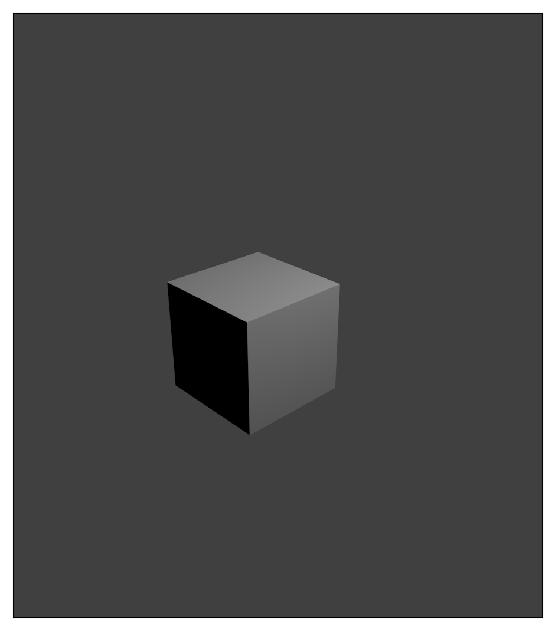

In [5]:
zero(my_dpi)
bpy.ops.mesh.primitive_cube_add()
plt.imshow(get_img(size=[1024, 896]))
plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()

## Bewegend blok in camerazicht (van bovenlinks tot onderrechts, iedere keer de rij afgaand)

<Figure size 800x800 with 0 Axes>

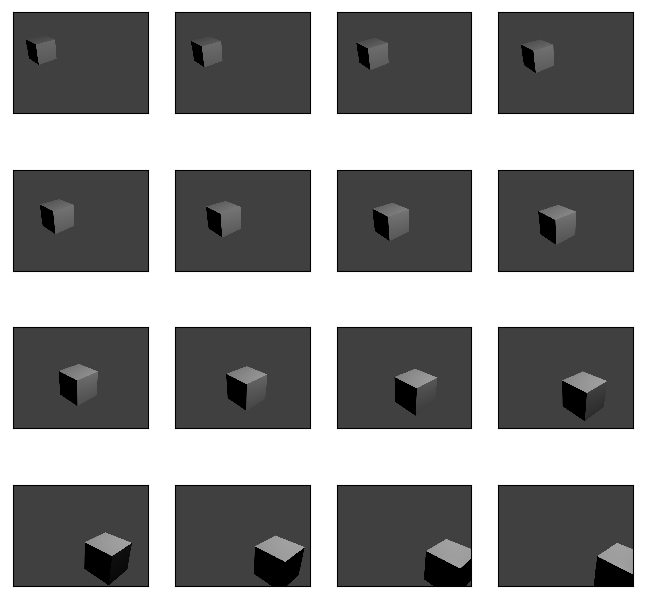

In [4]:
#with warnings.catch_warnings():

zero(my_dpi)
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
bpy.ops.mesh.primitive_cube_add()
c=bpy.data.objects['Cube']

xnum=4
ynum=4
for i,x in enumerate(np.linspace(-5,5,xnum*ynum)):
    c.location.x=x
    plt.subplot(ynum,xnum,i+1)
    plt.imshow(get_img())
    plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()

## Camera verspringt met ieder blok

<Figure size 800x800 with 0 Axes>

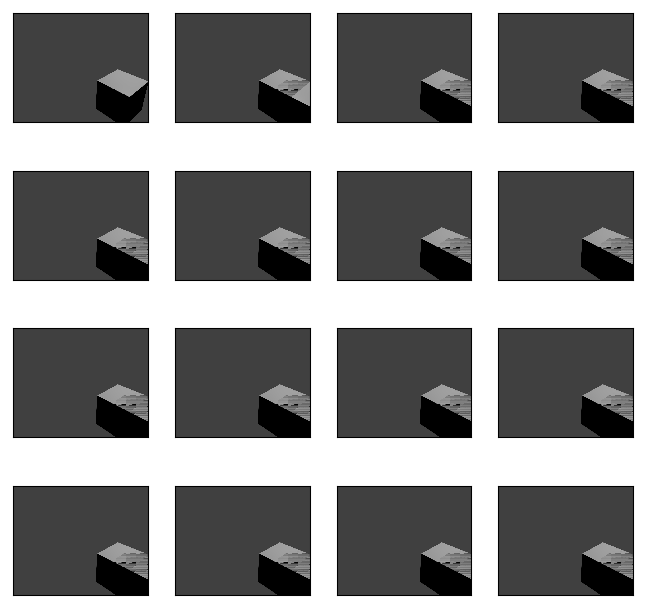

In [5]:
zero(my_dpi)
if(len(bpy.data.cameras) == 1):
    cam = bpy.data.objects['Camera']

ttc = cam.constraints.new(type='TRACK_TO')
ttc.track_axis = 'TRACK_X'
ttc.up_axis = 'UP_X'

#bpy.ops.object.select_all(action='DESELECT')
#pointyobj.select = True
#bpy.ops.object.visual_transform_apply() 
    
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)

for i, x in enumerate(range(0,16)):
    bpy.ops.mesh.primitive_cube_add()
    c = bpy.context.active_object
    c.name = 'cube' + str(i)
    c.location.x = x + 4
    ttc.target = c
    
    bpy.ops.object.select_all(action='DESELECT')
    cam.select = True
    bpy.ops.object.visual_transform_apply()
    plt.subplot(4,4,i+1)
    plt.imshow(get_img(size=[680,840]))
    plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()
cam.constraints.remove(ttc) 

## Draaiende camera op een bewegend blok

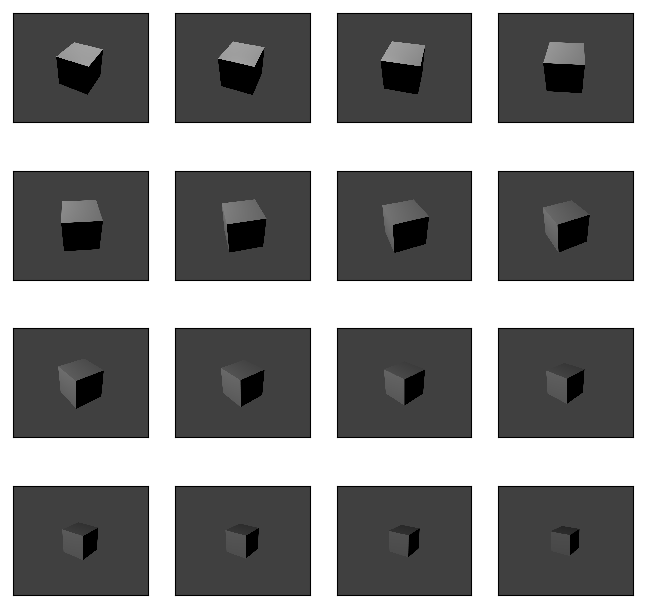

In [5]:
zero(my_dpi)

bpy.ops.mesh.primitive_cube_add()
c = bpy.context.active_object
c.name = 'cube' #+ str(i)

for i, x in enumerate(range(0,16)):
    c.location.x = x + 4
    point_at(cam, c.location, roll=0)  
    plt.subplot(4,4,i+1)
    plt.imshow(get_img(size=[680,840]))
    plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()

## Draaiende camera op een bewegend en roterend blok

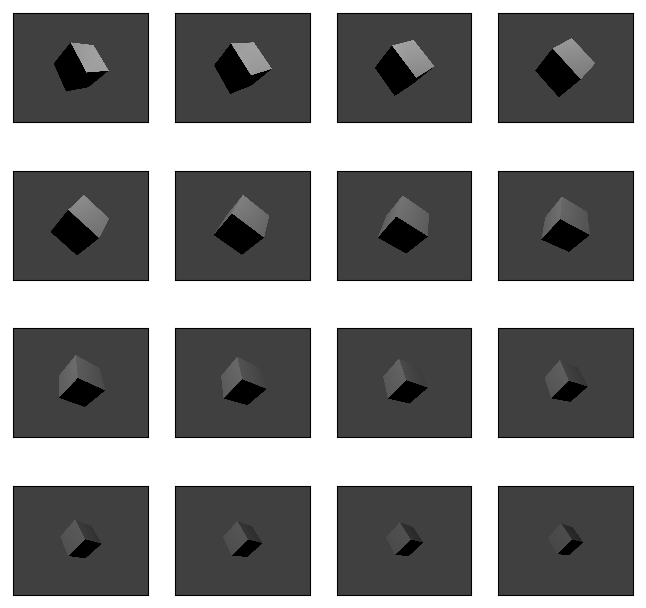

In [11]:
zero(my_dpi)

bpy.ops.mesh.primitive_cube_add()
c = bpy.context.active_object
c.name = 'cube' #+ str(i)

for i, x in enumerate(range(0,16)):
    c.location.x = x + 4
    point_at(cam, c.location, roll=math.radians(45))  
    plt.subplot(4,4,i+1)
    plt.imshow(get_img(size=[680,840]))
    plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()

## Bewegend draaiend blok

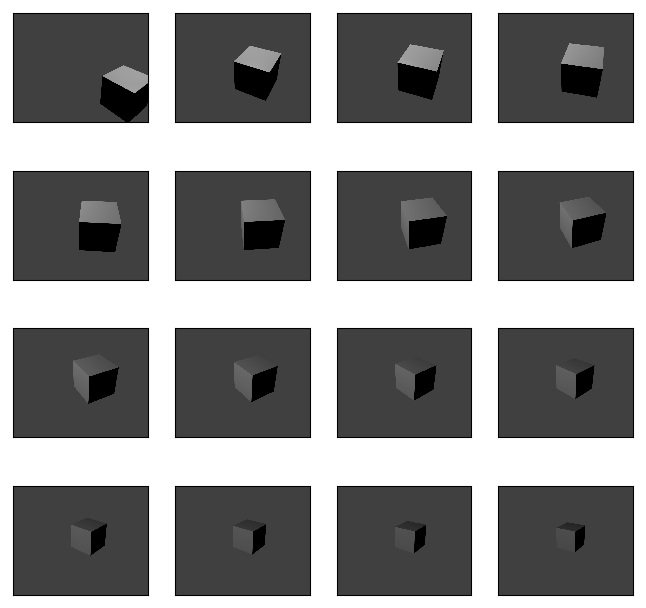

In [7]:
zero(my_dpi) 

bpy.ops.mesh.primitive_cube_add()
c = bpy.context.active_object
c.name = 'cube' #+ str(i)

for i, x in enumerate(range(0,16)):
    c.location.x = x + 4
    #point_at(cam, c.location, roll=math.radians(45))  
    look_at(cam, c.matrix_world.to_translation())
    plt.subplot(4,4,i+1)
    plt.imshow(get_img(size=[680,840]))
    plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()

## Trager Bewegend blok in camerazicht

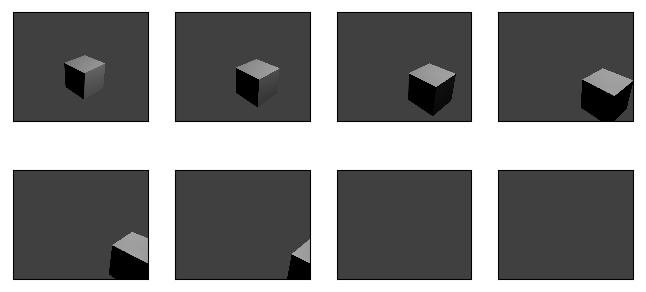

In [10]:
zero(my_dpi)

bpy.ops.mesh.primitive_cube_add()
c = bpy.context.active_object
c.name = 'cube' #+ str(i)

for i, x in enumerate(range(0,8)):
    c.location.x = x + 1
    plt.subplot(4,4,i+1)
    plt.imshow(get_img(size=[680,840]))
    plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()

## Wegdraaiende camera van een stilstaande blok (x, y en dan z-as)

cam location <Vector (8.4811, -6.5076, 5.3437)>
cam location <Vector (9.4811, -6.5076, 5.3437)>
cam location <Vector (10.4811, -6.5076, 5.3437)>
cam location <Vector (11.4811, -6.5076, 5.3437)>
cam location <Vector (12.4811, -6.5076, 5.3437)>
cam location <Vector (13.4811, -6.5076, 5.3437)>
cam location <Vector (14.4811, -6.5076, 5.3437)>
cam location <Vector (15.4811, -6.5076, 5.3437)>


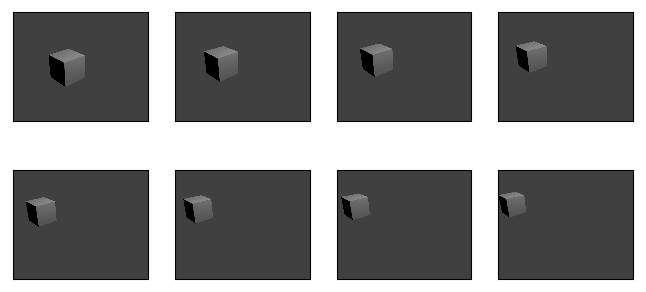

cam location <Vector (7.4811, -5.5076, 5.3437)>
cam location <Vector (7.4811, -4.5076, 5.3437)>
cam location <Vector (7.4811, -3.5076, 5.3437)>
cam location <Vector (7.4811, -2.5076, 5.3437)>
cam location <Vector (7.4811, -1.5076, 5.3437)>
cam location <Vector (7.4811, -0.5076, 5.3437)>
cam location <Vector (7.4811, 0.4924, 5.3437)>
cam location <Vector (7.4811, 1.4924, 5.3437)>


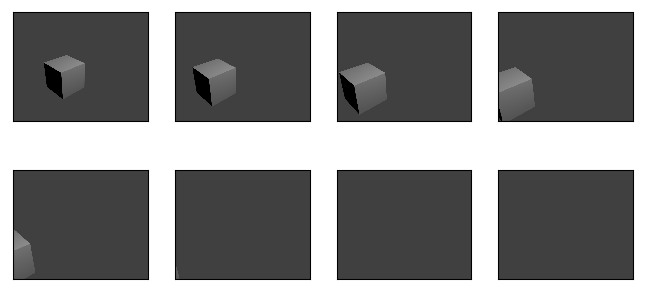

cam location <Vector (7.4811, -6.5076, 6.3437)>
cam location <Vector (7.4811, -6.5076, 7.3437)>
cam location <Vector (7.4811, -6.5076, 8.3437)>
cam location <Vector (7.4811, -6.5076, 9.3437)>
cam location <Vector (7.4811, -6.5076, 10.3437)>
cam location <Vector (7.4811, -6.5076, 11.3437)>
cam location <Vector (7.4811, -6.5076, 12.3437)>
cam location <Vector (7.4811, -6.5076, 13.3437)>


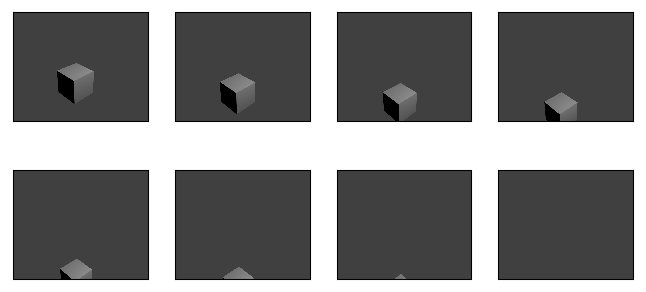

In [15]:
for count, axis in enumerate(range(3)):
    zero(my_dpi)
    
    bpy.ops.mesh.primitive_cube_add()
    c = bpy.context.active_object
    c.name = 'cube' 

    for i, x in enumerate(range(0,8)):
        cam.location[count] += 1
        print('cam location', cam.location)
        plt.subplot(4,4,i+1)
        plt.imshow(get_img(size=[680,840]))
        plt.xticks([]);plt.yticks([])
    plt.show()
    tmpdir.cleanup()

## Testen van pointen

<Figure size 800x800 with 0 Axes>

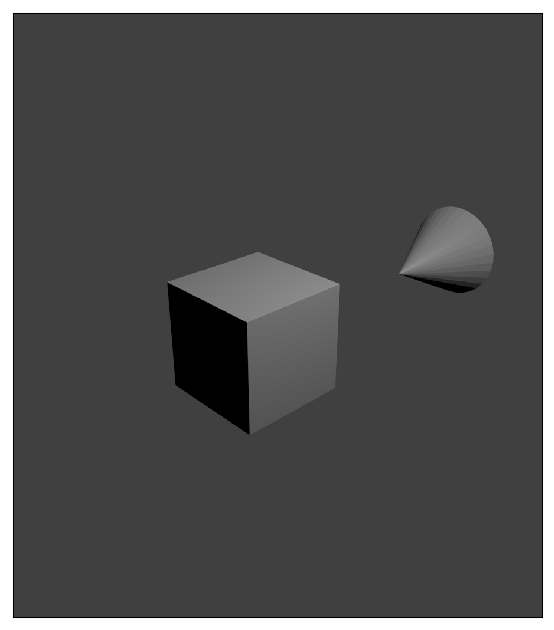

In [4]:
zero(my_dpi)
bpy.ops.mesh.primitive_cube_add()
bpy.ops.mesh.primitive_cone_add(location =[0,5,0])
bpy.context.object.data.vertices

targetobj = bpy.data.objects['Cube']
pointyobj = bpy.data.objects['Cone']

ttc = pointyobj.constraints.new(type='TRACK_TO')
ttc.target = targetobj
ttc.track_axis = 'TRACK_Z'
# we don't care about the up_axis
# but default is Z and it needs to be different that track_axis
ttc.up_axis = 'UP_X'

bpy.ops.object.select_all(action='DESELECT')
pointyobj.select = True
bpy.ops.object.visual_transform_apply()

pointyobj.constraints.remove(ttc)

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.imshow(get_img(size=[1024, 896]))
plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()

## Pointen met gezichten (De Regendans)

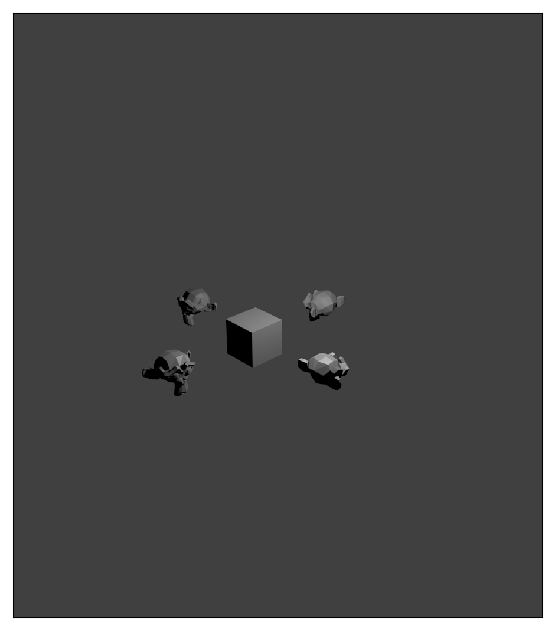

In [90]:
cam = zero(my_dpi)

cam.location *= 3 # inzoomen of uitzoomen
bpy.ops.mesh.primitive_cube_add()

coordinates = [[-5,0,0],[0,5,0],[0,-5,0],[5,0,0]]

monklist = []

for count, coord in enumerate(coordinates):
    bpy.ops.mesh.primitive_monkey_add(location = coord)  
    monk = bpy.context.active_object
    monk.name = 'monk' + str(count)
    monklist.append(monk)

targetobj = bpy.data.objects['Cube']

for monk in monklist:

    ttc = monk.constraints.new(type='TRACK_TO')
    ttc.target = targetobj
    ttc.track_axis = 'TRACK_X'
    ttc.up_axis = 'UP_Z'

    bpy.ops.object.select_all(action='DESELECT')
    monk.select = True
    bpy.ops.object.visual_transform_apply()

    monk.constraints.remove(ttc)

plt.imshow(get_img(size=[1024, 896]))
plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()

## Ecce Kubusculus

<bpy_collection[507], MeshVertices>
[bpy.data.objects['BezierCircle'], bpy.data.objects['Camera'], bpy.data.objects['Cube'], bpy.data.objects['Lamp'], bpy.data.objects['lamp0'], bpy.data.objects['lamp1'], bpy.data.objects['lamp10'], bpy.data.objects['lamp11'], bpy.data.objects['lamp12'], bpy.data.objects['lamp13'], bpy.data.objects['lamp14'], bpy.data.objects['lamp2'], bpy.data.objects['lamp3'], bpy.data.objects['lamp4'], bpy.data.objects['lamp5'], bpy.data.objects['lamp6'], bpy.data.objects['lamp7'], bpy.data.objects['lamp8'], bpy.data.objects['lamp9'], bpy.data.objects['LightCurve'], bpy.data.objects['Megamonk1'], bpy.data.objects['Megamonk2'], bpy.data.objects['monk0'], bpy.data.objects['monk1'], bpy.data.objects['monk10'], bpy.data.objects['monk11'], bpy.data.objects['monk12'], bpy.data.objects['monk13'], bpy.data.objects['monk14'], bpy.data.objects['monk15'], bpy.data.objects['monk16'], bpy.data.objects['monk17'], bpy.data.objects['monk18'], bpy.data.objects['monk19'], bpy.data.ob

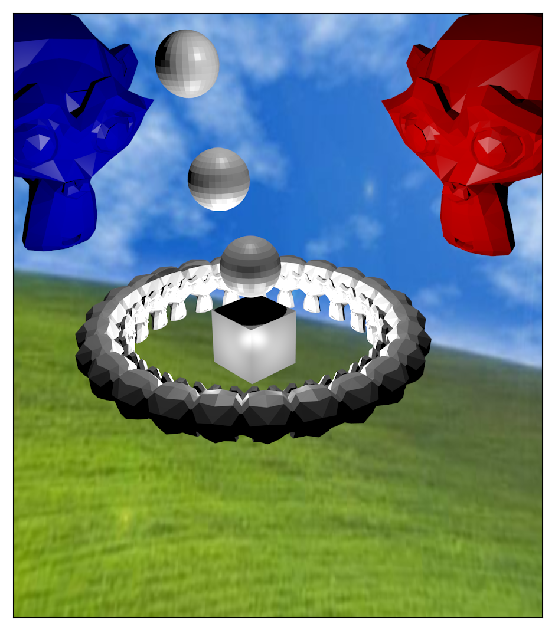

In [8]:
from bpy import context, data, ops

bpy.ops.object.mode_set(mode='EDIT')
cam = zero(my_dpi)

# Create a bezier circle and enter edit mode.
ops.curve.primitive_bezier_circle_add(radius=5.0,
                                      location=(0.0, 0.0, 0.0),
                                      enter_editmode=True)

ops.curve.subdivide(number_cuts=30)

# Assumes your active object is a Bezier Curve.
obj = bpy.context.active_object
curve = obj.data

# Assumes your Bezier is composed of only one spline.
spline = curve.splines[0]
    
coordinates = [x.co for x in spline.bezier_points]

###########################

# sample data
coords = [(0,0,0), (1,0,0), (-4,0,7), (7,0,15), (-7,0,22), (0,0,30)] 

# create the Curve Datablock
curveData = bpy.data.curves.new('myCurve', type='CURVE')
curveData.dimensions = '3D'
curveData.resolution_u = 2

# map coords to spline
polyline = curveData.splines.new('NURBS')
polyline.points.add(len(coords))
for i, coord in enumerate(coords):
    x,y,z = coord
    polyline.points[i].co = (x, y, z, 1)

# create Object
curveOB = bpy.data.objects.new('LightCurve', curveData)

# attach to scene and validate context
scene = bpy.context.scene
scene.objects.link(curveOB)
scene.objects.active = curveOB
curveOB.select = True

def get_verts_edges(nurbs_object, use_modifiers=True, settings='PREVIEW'):
    scene = bpy.context.scene
    # create a temporary mesh
    obj_data = obj.to_mesh(scene, use_modifiers, settings)

    verts = [v.co for v in obj_data.vertices]
    edges = obj_data.edge_keys

    # discard temporary mesh
    bpy.data.meshes.remove(obj_data)
    return verts, edges

obj = bpy.data.objects['LightCurve']
verts, edges = get_verts_edges(obj)

new_verts = [x + y for x, y in zip(verts, verts[1:])]

bpy.ops.object.mode_set(mode='EDIT')

light = bpy.data.materials.new('Light')

for count, coord in enumerate(new_verts[0::5]):
    #bpy.ops.object.lamp_add(location = coord, type='SUN')  
    bpy.ops.mesh.primitive_uv_sphere_add(location = coord)  
    lamp = bpy.context.active_object
    lamp.name = 'lamp' + str(count)
    #bpy.ops.object.mode_set(mode = 'EDIT')
    #bpy.ops.uv.unwrap()
    #bpy.ops.object.bake(pass_filter={'EMIT', 'INDIRECT'})
    light.emit = 10.0
    obj.data.materials.append(light)
    
###########################
    
red = bpy.data.materials.new('Red')
blue = bpy.data.materials.new('Blue')

def setColor(obj, material, color):
    material.diffuse_color = color
    material.specular_hardness = 200
    obj.data.materials.append(material)
    
###########################

cam.location *= 2 # inzoomen of uitzoomen
bpy.ops.mesh.primitive_cube_add()
cube = bpy.context.active_object

bpy.data.objects['Lamp'].location = [0,0,10]
lamp_locs = [[-2,0,0],[0,2,0],[0,-2,0],[2,0,0]]

for loc in lamp_locs:
    bpy.ops.object.lamp_add(location = loc)

monklist = []

for count, coord in enumerate(coordinates[0::5]):
    bpy.ops.mesh.primitive_monkey_add(location = coord)  
    monk = bpy.context.active_object
    monk.name = 'monk' + str(count)
    monklist.append(monk)
    
###########################
    
bpy.ops.mesh.primitive_monkey_add(location = (-15,0,5))  
Megamonk1 = bpy.context.active_object
Megamonk1.name = 'Megamonk1'
x, y, z = bpy.data.objects['Megamonk1'].dimensions
bpy.data.objects['Megamonk1'].dimensions = (x*5, y*5, z*5)
setColor(Megamonk1, red, (0, 0, 1))
#coloredEyes('Megamonk1')
monklist.append(Megamonk1)

bpy.ops.mesh.primitive_monkey_add(location = (0,15,5))  
Megamonk2 = bpy.context.active_object
Megamonk2.name = 'Megamonk2'
x, y, z = bpy.data.objects['Megamonk2'].dimensions
bpy.data.objects['Megamonk2'].dimensions = (x*5, y*5, z*5)
setColor(Megamonk2, blue, (1, 0, 0))
#coloredEyes('Megamonk2')
monklist.append(Megamonk2)

###########################
    
print(bpy.context.object.data.vertices)
print(list(bpy.data.objects))

###########################

targetobj = bpy.data.objects['Cube']

for monk in monklist:

    ttc = monk.constraints.new(type='TRACK_TO')
    ttc.target = targetobj
    ttc.track_axis = 'TRACK_NEGATIVE_Y' 
    ttc.up_axis = 'UP_Z' 

    bpy.ops.object.select_all(action='DESELECT')
    monk.select = True
    bpy.ops.object.visual_transform_apply()

    monk.constraints.remove(ttc)

###########################    

filepath = r"C:\Users\Emperor Justinian\Pictures\bliss.jpg"
        
def add_background(filepath):
    img = bpy.data.images.load(filepath)
    for area in bpy.context.screen.areas:
        if area.type == 'VIEW_3D':
            space_data = area.spaces.active
            bg = space_data.background_images.new()
            bg.image = img
            space_data.show_background_images = True
            break
    return img

texture = bpy.data.textures.new("Texture.001", 'IMAGE')
img = add_background(filepath)
texture.image = img
bpy.data.worlds['World'].active_texture = texture
bpy.context.scene.world.texture_slots[0].use_map_horizon = True
    
###########################
    
plt.imshow(get_img(size=[1024, 896]))
plt.xticks([]);plt.yticks([])
plt.show()
plt.imsave('C://Users//Emperor Justinian//Jupyter_Notebooks//Blender//images//Ecce Kubusculus.png', get_img(size=[1024, 896]))
tmpdir.cleanup()

## The Ring

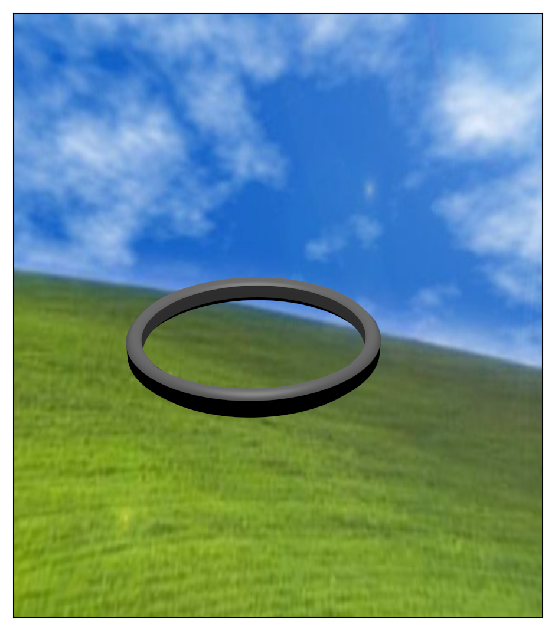

In [7]:
from bpy import context, data, ops

cam = zero(my_dpi)

# Create a bezier circle and enter edit mode.
ops.curve.primitive_bezier_circle_add(radius=1.0,
                                      location=(0.0, 0.0, 0.0),
                                      enter_editmode=True)

# Subdivide the curve by a number of cuts, giving the
# random vertex function more points to work with.
ops.curve.subdivide(number_cuts=30)

# Assumes your active object is a Bezier Curve.
obj = bpy.context.active_object
curve = obj.data

# Assumes your Bezier is composed of only one spline.
spline = curve.splines[0]

segmentResults = []

# Iterate the control points in the spline and interpolate them.
for i in range(1, len(spline.bezier_points)):
    
    # You always need at least 2 points to interpolate between.  Get the first and
    # second points for this segment of the spline.
    firstPt = spline.bezier_points[i-1]
    secondPt = spline.bezier_points[i]
    
    # Get all the points on the curve between these two items.  Uses the default of 12 for a "preview" resolution
    # on the curve.  Note the +1 because the "preview resolution" tells how many segments to use.  ie. 2 =&gt; 2 segments
    # or 3 points.  The "interpolate_bezier" functions takes the number of points it should generate.
    segmentResults.append(mathutils.geometry.interpolate_bezier(firstPt.co, firstPt.handle_right, secondPt.handle_left, secondPt.co, 12+1))

# Randomize the vertices of the bezier circle.
# offset [-inf .. inf], uniform [0.0 .. 1.0],
# normal [0.0 .. 1.0], RNG seed [0 .. 10000].
#ops.transform.vertex_random(offset=1.0, uniform=0.1, normal=0.0, seed=0)

# Scale the curve while in edit mode.
ops.transform.resize(value=(2.0, 2.0, 3.0))

# Return to object mode.
ops.object.mode_set(mode='OBJECT')

# Store a shortcut to the curve object's data.
obj_data = context.active_object.data

# Which parts of the curve to extrude ['HALF', 'FRONT', 'BACK', 'FULL'].
obj_data.fill_mode = 'FULL'

# Breadth of extrusion.
obj_data.extrude = 0.125

# Depth of extrusion.
obj_data.bevel_depth = 0.125

# Smoothness of the segments on the curve.
obj_data.resolution_u = 20
obj_data.render_resolution_u = 32

plt.imshow(get_img(size=[1024, 896]))
plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()

## Vectors (Coordinaten)

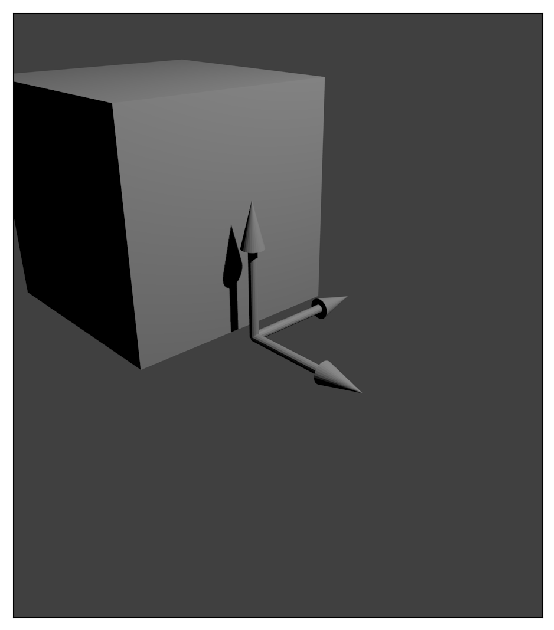

In [3]:
cam = zero(my_dpi)
cam.location *= 0.5

scene = bpy.context.scene
objects = bpy.data.objects

bpy.ops.mesh.primitive_cube_add(location = (-1.2, 0, 1))

vectors = [
   [(0,0,0), (0,0,1)],
   [(0,0,0), (0,1,0)],
   [(0,0,0), (1,0,0)]
]

add_vectors(vectors)

plt.imshow(get_img(size=[1024, 896]))
plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()

## Alternatieve manier (geen coordinaten, maar lengtes)

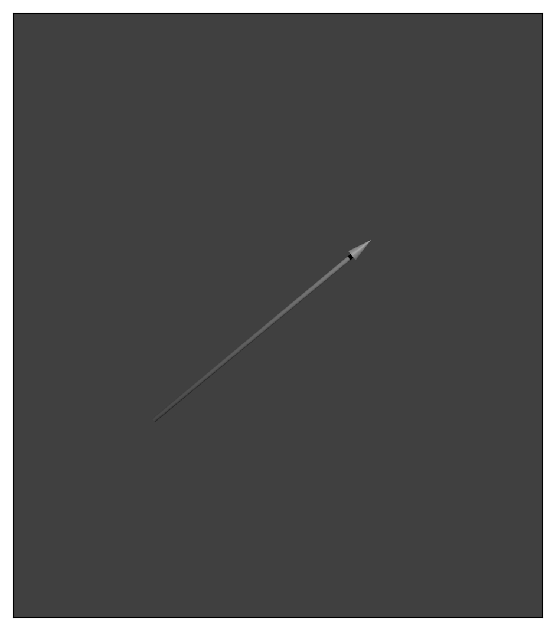

In [25]:
cam = zero(my_dpi)

x=2  
y=3
z=3
yParameter=-1.0
if y < 0:
    if x < 0: 
        yParameter = 1.0

for i in range (0,1):
    length=sqrt(z*z+y*y+x*x)

#Create a vector at correct orientation at the origin
bpy.ops.mesh.primitive_cylinder_add(vertices=16, radius=0.04, depth=length, end_fill_type='NGON', view_align=False, enter_editmode=False, location=(0,0,0),rotation=(-acos(z/sqrt(x*x+y*y+z*z)),0,yParameter*acos(y/sqrt(x*x+y*y))))

bpy.ops.mesh.primitive_cone_add(vertices=32, radius1=0.1, radius2=0, depth=0.4, end_fill_type='NGON', view_align=False, enter_editmode=False, location=(0,0,0), rotation=(-acos(z/sqrt(x*x+y*y+z*z)),0,yParameter*acos(y/sqrt(x*x+y*y))))
bpy.ops.transform.translate(value=(x/2, y/2, z/2))

plt.imshow(get_img(size=[1024, 896]))
plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()

## Simpele animatie

In [3]:
zero(my_dpi)
print(list(bpy.data.objects))

bpy.ops.mesh.primitive_cube_add()
Cube = bpy.data.objects["Cube"]
print('start pos', Cube.delta_location)

#frames = 200
with imageio.get_writer('images//Gifs//x_pos.gif', fps=20, mode='I') as writer:
    for i in np.linspace(0, 10, 5, endpoint=True):
        Cube.delta_location += mathutils.Vector((i, 0, 0)) #x, y, z
        writer.append_data(imageio.imread(get_img(size=[1024, 896]).filename))
    tmpdir.cleanup()
    writer.close()
JupImage(url='images//Gifs//x_pos.gif')  

[bpy.data.objects['Camera'], bpy.data.objects['Lamp']]
start pos <Vector (0.0000, 0.0000, 0.0000)>


<Figure size 800x800 with 0 Axes>

In [4]:
cam = zero(my_dpi)

bpy.ops.mesh.primitive_cube_add()

from mathutils import Vector

# useful shortcut
scene = bpy.context.scene

# this shows you all objects in scene
scene.objects.keys()

# when you start default Blender project, first object in scene is a Cube
kostka = scene.objects[0]

# you can change location of object simply by setting the values
kostka.location = (1,2,0)

# same with rotation
kostka.rotation_euler = (45,0,0)

# this will make object cease from current scene
scene.objects.unlink(kostka)

# create sphere and make it smooth
bpy.ops.mesh.primitive_uv_sphere_add(location = (2,1,2), size=0.5)  
bpy.ops.object.shade_smooth()  
kule = bpy.context.object

# create new cube
bpy.ops.mesh.primitive_cube_add(location = (-2,1,2))  
kostka = bpy.context.object

# create plane 
bpy.ops.mesh.primitive_plane_add(location=(0,0,0))  
plane = bpy.context.object  
plane.dimensions = (20,20,0)

# for every object add material - here represented just as color
for col, ob in zip([(1, 0, 0), (0,1,0), (0,0,1)], [kule, kostka, plane]):  
    mat = bpy.data.materials.new("mat_" + str(ob.name))
    mat.diffuse_color = col
    ob.data.materials.append(mat)

# now add some light
lamp_data = bpy.data.lamps.new(name="lampa", type='POINT')  
lamp_object = bpy.data.objects.new(name="Lampicka", object_data=lamp_data)  
scene.objects.link(lamp_object)  
lamp_object.location = (-3, 0, 12)

# and now set the camera
cam_data = bpy.data.cameras.new(name="cam2")  
cam_ob = bpy.data.objects.new(name="Kamerka", object_data=cam_data)  
scene.objects.link(cam_ob)  
cam.location = [-3, 0, 5]
cam.rotation_euler = [3.14/6,0,-0.3]
cam = bpy.data.cameras[cam.name]  
cam.lens = 10


### animation
positions = (0,0,2),(0,1,2),(3,2,1),(3,4,1),(1,2,1)

with imageio.get_writer('images//Gifs//movie.gif', fps=20, mode='I') as writer:

    # start with frame 0
    number_of_frame = 0  
    for pozice in positions:

        # now we will describe frame with number $number_of_frame
        scene.frame_set(number_of_frame)

        # set new location for sphere $kule and new rotation for cube $kostka
        kule.location = pozice
        kule.keyframe_insert(data_path="location", index=-1)

        kostka.rotation_euler = pozice
        kostka.keyframe_insert(data_path="rotation_euler", index=-1)
        
        writer.append_data(imageio.imread(get_img(size=[1024, 896]).filename))

        # move next 10 frames forward - Blender will figure out what to do between this time
        number_of_frame += 10
    writer.close()

tmpdir.cleanup()
JupImage(url='images//Gifs//movie.gif')  

<Figure size 800x800 with 0 Axes>

## Physics (Vallende blokken)

In [37]:
cam = zero(my_dpi)
cam.location *= 2
cam.location -= mathutils.Vector((8,0,0))

bpy.ops.mesh.primitive_plane_add(location = (0,0,0), radius=10)
bpy.ops.rigidbody.object_add()
bpy.context.object.rigid_body.type = 'PASSIVE'

bpy.context.scene.frame_set(1)

with imageio.get_writer('images//Gifs//falling.gif', fps=10, mode='I') as writer:
    for i in range(0, 20, 5):
        bpy.ops.mesh.primitive_cube_add(location = (i, 0, 5))
        bpy.ops.rigidbody.object_add()
        bpy.context.object.rigid_body.mass = 20
        bpy.context.object.rigid_body.collision_shape = 'BOX'
        bpy.context.object.rigid_body.friction = 1
        bpy.context.object.rigid_body.use_margin = True
        bpy.context.object.rigid_body.collision_margin = 0
        bpy.context.object.rigid_body.linear_damping = 0.35
        bpy.context.object.rigid_body.angular_damping = 0.6
        bpy.context.scene.frame_set(bpy.context.scene.frame_current + 1)
        writer.append_data(imageio.imread(get_img(size=[1024, 896]).filename))
    for i in range(40):
        bpy.context.scene.frame_set(bpy.context.scene.frame_current + 1)
        writer.append_data(imageio.imread(get_img(size=[1024, 896]).filename))
    tmpdir.cleanup()
    writer.close()
JupImage(url='images//Gifs//falling.gif')  

<Figure size 800x800 with 0 Axes>

## Physics (Sloopbal)

In [3]:
cam = zero(my_dpi)

cam.location *= 15

bpy.context.scene.frame_set(1)
bpy.ops.mesh.primitive_plane_add(radius=100, location=(0, 0, 0))
bpy.ops.rigidbody.object_add()
bpy.context.object.rigid_body.type = 'PASSIVE'

coords = [(10, 0, 0), (0, 10, 0), (-10, 0, 0), (0, -10, 0)]

for coord in coords:
    bpy.ops.object.lamp_add(location = coord)  
                                 
with imageio.get_writer('images//Gifs//sloopkogel.gif', fps=10, mode='I') as writer:                                 
    for x in range(1,19):
        bpy.ops.mesh.primitive_torus_add(location=(0, x*4.3, 110), rotation=(0,1.5708*(x%2), 0), major_radius=3.5, minor_radius=.5, abso_major_rad=1.25, abso_minor_rad=0.75)
        bpy.ops.rigidbody.object_add()
        bpy.context.object.rigid_body.collision_shape = 'MESH'
        if x==1:
            bpy.context.object.rigid_body.enabled = False
        for z in range (0,9): 
            bpy.ops.mesh.primitive_cube_add(radius=3, location=(x*6-60,2,2.8+z*6))
            bpy.ops.rigidbody.object_add()        
            bpy.context.object.rigid_body.mass = 0.0001
        bpy.context.scene.frame_set(bpy.context.scene.frame_current + 1)
        writer.append_data(imageio.imread(get_img(size=[1024, 896]).filename))
    for i in range(40):
        bpy.context.scene.frame_set(bpy.context.scene.frame_current + 1)
        writer.append_data(imageio.imread(get_img(size=[1024, 896]).filename))
    tmpdir.cleanup()
    writer.close()
JupImage(url='images//Gifs//sloopkogel.gif')  

<Figure size 800x800 with 0 Axes>

## CT scan data

In [13]:
zero(my_dpi)

# replace these two lines with your data filling code
#x_size = y_size = z_size = 10
#data = np.random.rand(x_size, y_size, z_size)

from PIL import Image
from skimage.color import rgb2gray

scene = bpy.context.scene

img = Image.open('C://Users//Emperor Justinian//Jupyter_Notebooks//Blender//images//geralt-thumbs-up.jpg')
img = img.resize((200, 100), Image.ANTIALIAS)
img = np.array(img)
#img = rgb2gray(img)

img = (img * 255).astype(np.uint8)
print(img.shape)

x_size = img.shape[0]
y_size = img.shape[1]
z_size = img.shape[2]

data = img

me = bpy.data.meshes.new("Mesh_new")
obj = bpy.data.objects.new("CT_Scan_new", me)
scene.objects.link(obj)
scene.objects.active = obj
obj.select = True

bm = bmesh.new()

for yy in range(y_size):
    for xx in range(x_size):
        for zz in range(z_size):
            c = data[yy, xx, zz]
            bmesh.ops.create_cube(bm, size=0.1,
                    matrix=mathutils.Matrix.Translation((xx / 10, zz / 10, yy / 10)))
            mat = bpy.data.materials.new(name="MaterialName")
            mat.diffuse_color = (c, c, c)
            obj.data.materials.append(mat)
            mat_idx = len(obj.data.materials)-1
            bm.faces.ensure_lookup_table()
            for i in range(6):
                # assign the last material to the last six faces created
                bm.faces[-i].material_index = mat_idx

bmesh.ops.remove_doubles(bm, verts=bm.verts, dist=0.001)
bm.to_mesh(me)

scene.update() # Makes sure blender doesn't try to make a new scene out of this, but updates one to increase performance

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.imshow(get_img(size=[1024, 896]))
plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()

(100, 200, 3)


IndexError: index 100 is out of bounds for axis 0 with size 100

<Figure size 800x800 with 0 Axes>

## Foto naar 3D

(100, 200, 3)


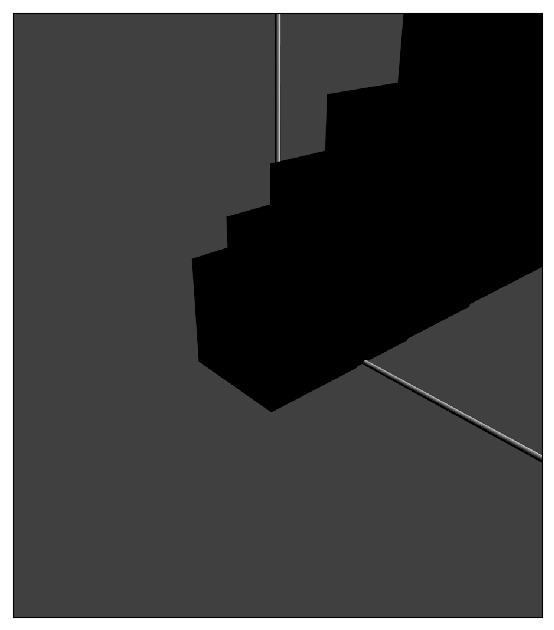

In [70]:
cam = zero(my_dpi)
#cam.location = (200, 0, 100)
#cam.location *= 2
cam.select = True 
ttc = cam.constraints.new(type='TRACK_TO')
empty = bpy.data.objects.new("Empty", None)
#empty.location = (200, 0, 0)
empty.location = (0, 0, 0)
ttc.target = empty
ttc.track_axis = 'TRACK_NEGATIVE_Z'
ttc.up_axis = 'UP_Y'

bpy.ops.object.select_all(action='DESELECT') 
cam.select = True
bpy.ops.object.visual_transform_apply()

cam.constraints.remove(ttc)




from PIL import Image
from skimage.color import rgb2gray

scene = bpy.context.scene

img = Image.open('C://Users//Emperor Justinian//Jupyter_Notebooks//Blender//images//geralt-thumbs-up.jpg')
img = img.resize((200, 100), Image.ANTIALIAS)
img = np.array(img)

#img = rgb2gray(img)

lx, ly = img.shape[:2]
X, Y = np.ogrid[0:lx, 0:ly]
X = np.ravel(X)
Y = np.ravel(Y)

img = (img * 255).astype(np.uint8)
print(img.shape)

me = bpy.data.meshes.new("Mesh_new")
obj = bpy.data.objects.new("Image_new", me)
scene.objects.link(obj)
scene.objects.active = obj
bm = bmesh.new()

for count, (x, y, z) in enumerate(zip(X, Y, img[0])):
    bpy.ops.mesh.primitive_cube_add(location = (x, 0, y))
    ob = bpy.context.active_object
    bpy.ops.object.lamp_add(location = (x, 20, y))
    mat = bpy.data.materials.new("mat_" + str(count))
    mat.use_nodes = True
    #nodes = mat.node_tree.nodes
    #node_emission = nodes.new(type='ShaderNodeEmission')
    #node_emission.inputs[0].default_value = (0,1,0,1)  # green RGBA
    #node_emission.inputs[1].default_value = 5.0
    #node_emission.location = 0,0
    #node_output = nodes.new(type='ShaderNodeOutputMaterial')   
    #node_output.location = 0,0
    
    mat.diffuse_color = z
    ob.data.materials.append(mat)
    
add_vectors([[(0,0,0), (200,0,0)],[(0,0,0), (0,0,100)]])

bmesh.ops.remove_doubles(bm, verts=bm.verts, dist=0.001)
bm.to_mesh(me)    
    
scene.update() # Makes sure blender doesn't try to make a new scene out of this, but updates one to increase performance

plt.imshow(get_img(size=[1024, 896]))
plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()

## Tracking point in a maze

In [11]:
cam = zero(my_dpi)

scene = bpy.context.scene

try:
    bpy.context.scene.camera.data.clip_end = 500
except:
    pass

bpy.ops.object.camera_add(view_align=False, location=[0,10,20])
cam2 = bpy.context.active_object

bpy.context.scene.frame_set(1)

gifpath = 'images//Gifs//maze.gif' 

###########################

me = bpy.data.meshes.new("Plane")
bm = bmesh.new()
bmesh.ops.create_grid(bm, x_segments=50, y_segments=50)
bmesh.ops.delete(bm, geom=bm.faces, context=3)
bm.to_mesh(me)

ob = bpy.data.objects.new("Grid", me)
scene.objects.link(ob)
scene.update()

###########################

coordinates = [] 

#Eerste muur
for x, y, z in zip(range(0, 21, 2), [0]*10, [0]*10):
    coordinates.append((x, y, z))
for x, y, z in zip(range(0, 21, 2), [0]*10, [1]*10):
    coordinates.append((x, y, z))
for x, y, z in zip(range(0, 21, 2), [0]*10, [2]*10):
    coordinates.append((x, y, z))
    
#Tweede muur
for x, y, z in zip([20]*10, range(1, 21, 2), [0]*10):
    coordinates.append((x, y, z))
for x, y, z in zip([20]*10, range(1, 21, 2), [1]*10):
    coordinates.append((x, y, z))
for x, y, z in zip([20]*10, range(1, 21, 2), [2]*10):
    coordinates.append((x, y, z))
    
#Derde muur
for x, y, z in zip(reversed(range(0, 19, 2)), [20]*10, [0]*10):
    coordinates.append((x, y, z))
for x, y, z in zip(reversed(range(0, 19, 2)), [20]*10, [1]*10):
    coordinates.append((x, y, z))
for x, y, z in zip(reversed(range(0, 19, 2)), [20]*10, [2]*10):
    coordinates.append((x, y, z))
    
print(coordinates)    
    
add_vectors([[(0,0,0), (20,0,0)],[(0,0,0), (20,20,0)], [(0,0,0), (0,20,0)]])

###########################    
    
with imageio.get_writer(gifpath, fps=10, mode='I') as writer:                                 
    for count, (x, y, z) in enumerate(coordinates):
        
        cam.select = True 
        ttc = cam.constraints.new(type='TRACK_TO')
        empty = bpy.data.objects.new("Empty", None)
        empty.location = (x, y, z)
        ttc.target = empty
        ttc.track_axis = 'TRACK_NEGATIVE_Z'
        ttc.up_axis = 'UP_Y'
        bpy.ops.object.select_all(action='DESELECT') 
        cam.select = True
        bpy.ops.object.visual_transform_apply()
        cam.constraints.remove(ttc)
        cam.location = (x + 20, y - 30, z + 30)
        
        bpy.ops.mesh.primitive_cube_add(location = (x, y, z))
        bpy.ops.object.lamp_add(location = (x, y + 1, z))
        mat = bpy.data.materials.new("mat_" + str(count))
        mat.diffuse_color = (5, 0, 0)
        bpy.context.scene.frame_set(bpy.context.scene.frame_current + 1)
        writer.append_data(imageio.imread(get_img(size=[1024, 896]).filename))
        
    for (x, y, z) in coordinates:
        cam2.select = True 
        cam2 = bpy.context.scene.camera
        ttc = cam2.constraints.new(type='TRACK_TO')
        empty.location = (x, y, z)
        ttc.target = empty
        ttc.track_axis = 'TRACK_NEGATIVE_Z'
        ttc.up_axis = 'UP_Y'
        bpy.ops.object.select_all(action='DESELECT') 
        cam2.select = True
        bpy.ops.object.visual_transform_apply()
        cam2.constraints.remove(ttc)
        cam2.location = (x - 20, y + 30, z + 30)
        
        bpy.context.scene.frame_set(bpy.context.scene.frame_current + 1)
        writer.append_data(imageio.imread(get_img(size=[1024, 896]).filename))
    tmpdir.cleanup()
    writer.close()

###########################    
    
cam = bpy.context.scene.camera     
JupImage(url=gifpath)  

[(0, 0, 0), (2, 0, 0), (4, 0, 0), (6, 0, 0), (8, 0, 0), (10, 0, 0), (12, 0, 0), (14, 0, 0), (16, 0, 0), (18, 0, 0), (0, 0, 1), (2, 0, 1), (4, 0, 1), (6, 0, 1), (8, 0, 1), (10, 0, 1), (12, 0, 1), (14, 0, 1), (16, 0, 1), (18, 0, 1), (0, 0, 2), (2, 0, 2), (4, 0, 2), (6, 0, 2), (8, 0, 2), (10, 0, 2), (12, 0, 2), (14, 0, 2), (16, 0, 2), (18, 0, 2), (20, 1, 0), (20, 3, 0), (20, 5, 0), (20, 7, 0), (20, 9, 0), (20, 11, 0), (20, 13, 0), (20, 15, 0), (20, 17, 0), (20, 19, 0), (20, 1, 1), (20, 3, 1), (20, 5, 1), (20, 7, 1), (20, 9, 1), (20, 11, 1), (20, 13, 1), (20, 15, 1), (20, 17, 1), (20, 19, 1), (20, 1, 2), (20, 3, 2), (20, 5, 2), (20, 7, 2), (20, 9, 2), (20, 11, 2), (20, 13, 2), (20, 15, 2), (20, 17, 2), (20, 19, 2), (18, 20, 0), (16, 20, 0), (14, 20, 0), (12, 20, 0), (10, 20, 0), (8, 20, 0), (6, 20, 0), (4, 20, 0), (2, 20, 0), (0, 20, 0), (18, 20, 1), (16, 20, 1), (14, 20, 1), (12, 20, 1), (10, 20, 1), (8, 20, 1), (6, 20, 1), (4, 20, 1), (2, 20, 1), (0, 20, 1), (18, 20, 2), (16, 20, 2), (14

<Figure size 800x800 with 0 Axes>

## zip werkt alleen als alle lijsten dezelfde lengte hebben, ik zoek een betere manier dan een nested loop

In [16]:
import itertools

#Eerste muur
for x, y, z in list(itertools.zip_longest(range(0, 21, 2), [0]*10, [0]*10, fillvalue=0)):
    print((x, y, z))
for x, y, z in list(itertools.zip_longest(range(0, 21, 2), [0]*10, [1]*10, fillvalue=0)):
    print((x, y, z))
for x, y, z in list(itertools.zip_longest(range(0, 21, 2), [0]*10, [2]*10, fillvalue=0)):
    print((x, y, z))
    
#Tweede muur
for x, y, z in list(itertools.zip_longest([20]*10, range(1, 21, 2), [0]*10, fillvalue=0)):
    print((x, y, z))
for x, y, z in list(itertools.zip_longest([20]*10, range(1, 21, 2), [1]*10, fillvalue=0)):
    print((x, y, z))
for x, y, z in list(itertools.zip_longest([20]*10, range(1, 21, 2), [2]*10, fillvalue=0)):
    print((x, y, z))
    
#Derde muur
for x, y, z in list(itertools.zip_longest(reversed(range(0, 21, 2)), [20]*10, [0]*10, fillvalue=0)):
    print((x, y, z))
for x, y, z in list(itertools.zip_longest(reversed(range(0, 21, 2)), [20]*10, [1]*10, fillvalue=0)):
    print((x, y, z))
for x, y, z in list(itertools.zip_longest(reversed(range(0, 21, 2)), [20]*10, [2]*10, fillvalue=0)):
    print((x, y, z))

(0, 0, 0)
(2, 0, 0)
(4, 0, 0)
(6, 0, 0)
(8, 0, 0)
(10, 0, 0)
(12, 0, 0)
(14, 0, 0)
(16, 0, 0)
(18, 0, 0)
(20, 0, 0)
(0, 0, 1)
(2, 0, 1)
(4, 0, 1)
(6, 0, 1)
(8, 0, 1)
(10, 0, 1)
(12, 0, 1)
(14, 0, 1)
(16, 0, 1)
(18, 0, 1)
(20, 0, 0)
(0, 0, 2)
(2, 0, 2)
(4, 0, 2)
(6, 0, 2)
(8, 0, 2)
(10, 0, 2)
(12, 0, 2)
(14, 0, 2)
(16, 0, 2)
(18, 0, 2)
(20, 0, 0)
(20, 1, 0)
(20, 3, 0)
(20, 5, 0)
(20, 7, 0)
(20, 9, 0)
(20, 11, 0)
(20, 13, 0)
(20, 15, 0)
(20, 17, 0)
(20, 19, 0)
(20, 1, 1)
(20, 3, 1)
(20, 5, 1)
(20, 7, 1)
(20, 9, 1)
(20, 11, 1)
(20, 13, 1)
(20, 15, 1)
(20, 17, 1)
(20, 19, 1)
(20, 1, 2)
(20, 3, 2)
(20, 5, 2)
(20, 7, 2)
(20, 9, 2)
(20, 11, 2)
(20, 13, 2)
(20, 15, 2)
(20, 17, 2)
(20, 19, 2)
(20, 20, 0)
(18, 20, 0)
(16, 20, 0)
(14, 20, 0)
(12, 20, 0)
(10, 20, 0)
(8, 20, 0)
(6, 20, 0)
(4, 20, 0)
(2, 20, 0)
(0, 0, 0)
(20, 20, 1)
(18, 20, 1)
(16, 20, 1)
(14, 20, 1)
(12, 20, 1)
(10, 20, 1)
(8, 20, 1)
(6, 20, 1)
(4, 20, 1)
(2, 20, 1)
(0, 0, 0)
(20, 20, 2)
(18, 20, 2)
(16, 20, 2)
(14, 20, 2)
(12, 20